# TRABAJO GRUPAL CORONAVIRUS

Group B: India, Peru, EEUU, Francia and Spain:

Kapil
María
Juan

---------------------

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import sys 
import os 
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
sys.path = list(set(sys.path)) 

In [3]:
import src.utils.visualization_tb as vis 
import src.utils.folders_tb as fol
import src.utils.mining_data_tb as mng
import src.utils.apis_tb as api

## 2.Data Wrangling

In [4]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") 
data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 55 columns]

In [5]:
data.shape

(61855, 55)

## 3. Data Cleaning

In [6]:
#Selecting assigned group B countries
data_sc = mng.country_select(df=data, count_list=['India', 'Peru', 'United States', 'France', 'Spain'])
data_sc.head()

iso_code continent location        date  total_cases  new_cases  \
24935      IND      Asia    India  2020-01-30          1.0        1.0   
24936      IND      Asia    India  2020-01-31          1.0        0.0   
24937      IND      Asia    India  2020-02-01          1.0        0.0   
24938      IND      Asia    India  2020-02-02          2.0        1.0   
24939      IND      Asia    India  2020-02-03          3.0        1.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
24935                 NaN           NaN         NaN                  NaN  ...   
24936                 NaN           NaN         NaN                  NaN  ...   
24937                 NaN           NaN         NaN                  NaN  ...   
24938                 NaN           NaN         NaN                  NaN  ...   
24939                 NaN           NaN         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
24935        6426.674             21.2                 282.28   
24936        6426.674             21.2                 282.28   
24937        6426.674             21.2                 282.28   
24938        6426.674             21.2                 282.28   
24939        6426.674             21.2                 282.28   

       diabetes_prevalence  female_smokers  male_smokers  \
24935                10.39             1.9          20.6   
24936                10.39             1.9          20.6   
24937                10.39             1.9          20.6   
24938                10.39             1.9          20.6   
24939                10.39             1.9          20.6   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
24935                   59.55                        0.53            69.66   
24936                   59.55                        0.53            69.66   
24937                   59.55                        0.53            69.66   
24938                   59.55                        0.53            69.66   
24939                   59.55                        0.53            69.66   

       human_development_index  
24935                     0.64  
24936                     0.64  
24937                     0.64  
24938                     0.64  
24939                     0.64  

[5 rows x 55 columns]

In [7]:
#Percentage of missing values.  This will help us decide which columns we have selected.
miss = data_sc.isnull().sum() * 100 / len(data_sc)
miss.sort_values()

iso_code                                  0.000000
hospital_beds_per_thousand                0.000000
female_smokers                            0.000000
diabetes_prevalence                       0.000000
cardiovasc_death_rate                     0.000000
gdp_per_capita                            0.000000
aged_70_older                             0.000000
aged_65_older                             0.000000
median_age                                0.000000
population_density                        0.000000
population                                0.000000
life_expectancy                           0.000000
human_development_index                   0.000000
total_cases_per_million                   0.000000
continent                                 0.000000
location                                  0.000000
date                                      0.000000
total_cases                               0.000000
new_cases                                 0.056306
new_cases_per_million          

In [8]:
# Function used to see the different values inside each column. If there were only five values, that column was not included. 
data_sc["aged_65_older"].unique()

array([ 5.989,  7.151, 15.413, 19.718, 19.436])

In [9]:
#Selecting the columns to analyse.
data_final = data_sc[["iso_code","continent","location","date","total_cases","total_cases_per_million","new_cases_smoothed","new_cases_smoothed_per_million","new_deaths_smoothed","new_deaths_smoothed_per_million","total_deaths","total_deaths_per_million","life_expectancy","stringency_index","new_deaths"]]
data_final

iso_code continent location        date  total_cases  \
24935      IND      Asia    India  2020-01-30          1.0   
24936      IND      Asia    India  2020-01-31          1.0   
24937      IND      Asia    India  2020-02-01          1.0   
24938      IND      Asia    India  2020-02-02          2.0   
24939      IND      Asia    India  2020-02-03          3.0   
...        ...       ...      ...         ...          ...   
52167      ESP    Europe    Spain  2021-01-19    2370742.0   
52168      ESP    Europe    Spain  2021-01-20    2412318.0   
52169      ESP    Europe    Spain  2021-01-21    2456675.0   
52170      ESP    Europe    Spain  2021-01-22    2499560.0   
52171      ESP    Europe    Spain  2021-01-23    2499560.0   

       total_cases_per_million  new_cases_smoothed  \
24935                    0.001                 NaN   
24936                    0.001                 NaN   
24937                    0.001                 NaN   
24938                    0.001                 NaN   
24939                    0.002                 NaN   
...                        ...                 ...   
52167                50705.871           33360.286   
52168                51595.106           33747.000   
52169                52543.822           34958.286   
52170                53461.054           35342.286   
52171                53461.054           35342.286   

       new_cases_smoothed_per_million  new_deaths_smoothed  \
24935                             NaN                  NaN   
24936                             NaN                  NaN   
24937                             NaN                  NaN   
24938                             NaN                  NaN   
24939                             NaN                  NaN   
...                               ...                  ...   
52167                         713.516              212.857   
52168                         721.787              251.286   
52169                         747.694              280.286   
52170                         755.907              303.857   
52171                         755.907              303.857   

       new_deaths_smoothed_per_million  total_deaths  \
24935                              NaN           NaN   
24936                              NaN           NaN   
24937                              NaN           NaN   
24938                              NaN           NaN   
24939                              NaN           NaN   
...                                ...           ...   
52167                            4.553       54173.0   
52168                            5.375       54637.0   
52169                            5.995       55041.0   
52170                            6.499       55441.0   
52171                            6.499       55441.0   

       total_deaths_per_million  life_expectancy  stringency_index  new_deaths  
24935                       NaN            69.66             10.19         NaN  
24936                       NaN            69.66             10.19         NaN  
24937                       NaN            69.66             10.19         NaN  
24938                       NaN            69.66             10.19         NaN  
24939                       NaN            69.66             10.19         NaN  
...                         ...              ...               ...         ...  
52167                  1158.662            83.56             71.30       404.0  
52168                  1168.586            83.56             71.30       464.0  
52169                  1177.227            83.56               NaN       404.0  
52170                  1185.782            83.56               NaN       400.0  
52171                  1185.782            83.56               NaN         0.0  

[1776 rows x 15 columns]

In [10]:
#Changing date column to datatime
mng.changing_dates(df=data_final,name_column="date")  

In [11]:
#Information of our columns to see if changes of format are needed
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 24935 to 52171
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         1776 non-null   object        
 1   continent                        1776 non-null   object        
 2   location                         1776 non-null   object        
 3   date                             1776 non-null   datetime64[ns]
 4   total_cases                      1776 non-null   float64       
 5   total_cases_per_million          1776 non-null   float64       
 6   new_cases_smoothed               1750 non-null   float64       
 7   new_cases_smoothed_per_million   1750 non-null   float64       
 8   new_deaths_smoothed              1750 non-null   float64       
 9   new_deaths_smoothed_per_million  1750 non-null   float64       
 10  total_deaths                     1630 non-null   float6

## 4.Creating an API.  

### We are creating the API in the file ../src/services/apis/server.py

4.1 - Create a dataframe with the mean new deaths of our selected countries.

4.2 - Transform this dataframe to a json format

4.3 - Create API with the json 

4.4 - Send the API to another group

### API workflow:

![API](../resources/API_info.png)

## 5. Visualization

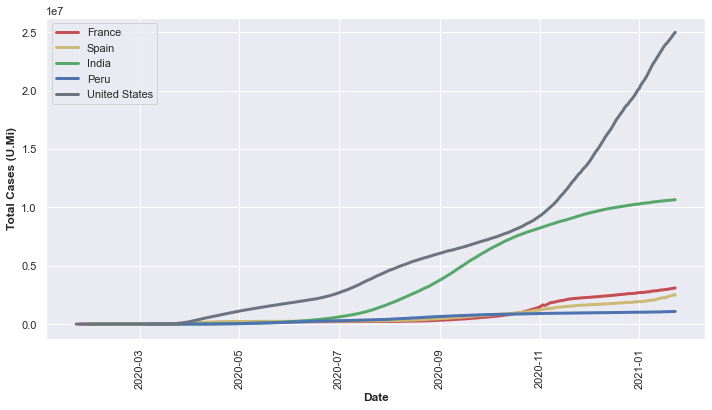

In [12]:
#@Mariacagi
# Total Cases of the five countries

# Seaborn Visualization
sns.set()

# Creating the graph
y_plot = data_final[(data_final["location"] == "France")].total_cases
x_plot = data_final[(data_final["location"] == "France")].date

y_plot2 = data_final[(data_final["location"] == "Spain")].total_cases
x_plot2 = data_final[(data_final["location"] == "Spain")].date

y_plot3 = data_final[(data_final["location"] == "India")].total_cases
x_plot3 = data_final[(data_final["location"] == "India")].date

y_plot4 = data_final[(data_final["location"] == "Peru")].total_cases
x_plot4 = data_final[(data_final["location"] == "Peru")].date

y_plot5 = data_final[(data_final["location"] == "United States")].total_cases
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values, y_plot, color='r', linewidth= 3, label="France")
plt.plot(x_plot2.values, y_plot2, color='y', linewidth= 3, label="Spain")
plt.plot(x_plot3.values, y_plot3, color='g', linewidth= 3, label="India")
plt.plot(x_plot4.values, y_plot4, color='b', linewidth= 3, label="Peru")
plt.plot(x_plot5.values, y_plot5,  color='#6B737E', linewidth= 3, label="United States")

# Labels 
plt.xlabel("Date", weight="bold")
plt.ylabel("Total Cases (U.Mi)", weight="bold")
plt.xticks(rotation="90")
plt.legend()

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\resources\\Total_Cases.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show()

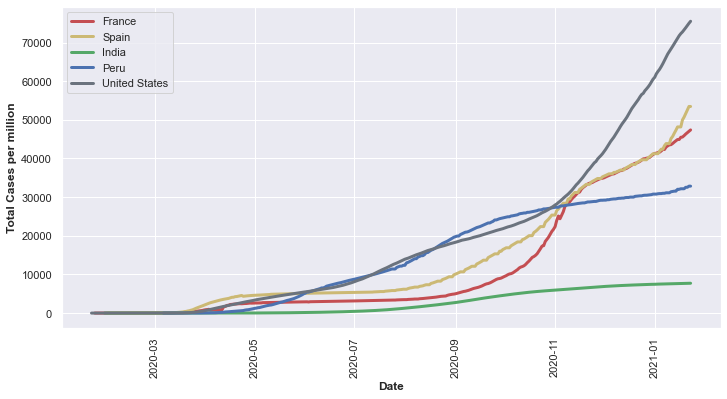

In [13]:
#@Mariacagi

# Seaborn Visualization
sns.set()

# Creating the graph
y_plot = data_final[(data_final["location"] == "France")].total_cases_per_million
x_plot = data_final[(data_final["location"] == "France")].date

y_plot2 = data_final[(data_final["location"] == "Spain")].total_cases_per_million
x_plot2 = data_final[(data_final["location"] == "Spain")].date

y_plot3 = data_final[(data_final["location"] == "India")].total_cases_per_million
x_plot3 = data_final[(data_final["location"] == "India")].date

y_plot4 = data_final[(data_final["location"] == "Peru")].total_cases_per_million
x_plot4 = data_final[(data_final["location"] == "Peru")].date

y_plot5 = data_final[(data_final["location"] == "United States")].total_cases_per_million
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values, y_plot, color='r', linewidth= 3, label="France")
plt.plot(x_plot2.values, y_plot2, color='y', linewidth= 3, label="Spain")
plt.plot(x_plot3.values, y_plot3, color='g', linewidth= 3, label="India")
plt.plot(x_plot4.values, y_plot4, color='b', linewidth= 3, label="Peru")
plt.plot(x_plot5.values, y_plot5, color='#6B737E', linewidth= 3, label="United States")

# Labels
plt.xlabel("Date", weight="bold")
plt.ylabel("Total Cases per million", weight="bold")
plt.xticks(rotation="90")
plt.legend()

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\resources\\Total_Cases_per_million.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

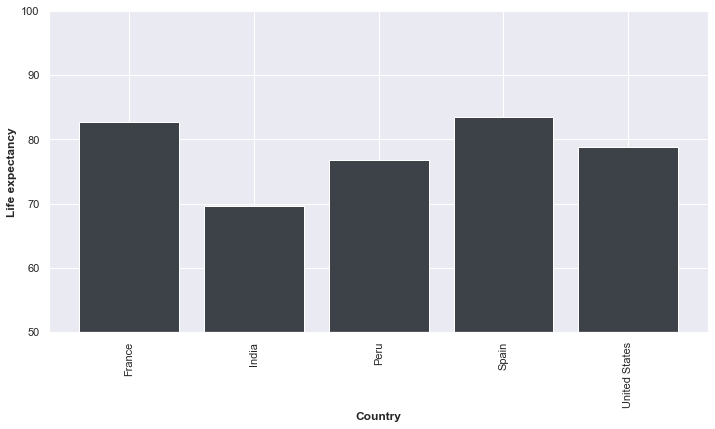

In [14]:
# @Mariacagi

# Seaborn Visualization
sns.set()

# Creating the graph
groupby_data = data_final.groupby("location").mean().sort_values(by="location")


plt.figure(figsize=(vis.cm_to_inch(30), vis.cm_to_inch(15)))
plt.ylim([50, 100])
plt.bar(x=groupby_data.index.values, height=groupby_data.life_expectancy, facecolor='#3d4248')

# Labels
plt.xlabel("Country", weight="bold")
plt.ylabel("Life expectancy", weight="bold")
plt.xticks(rotation="90")

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\resources\\Life_Expectancy.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show

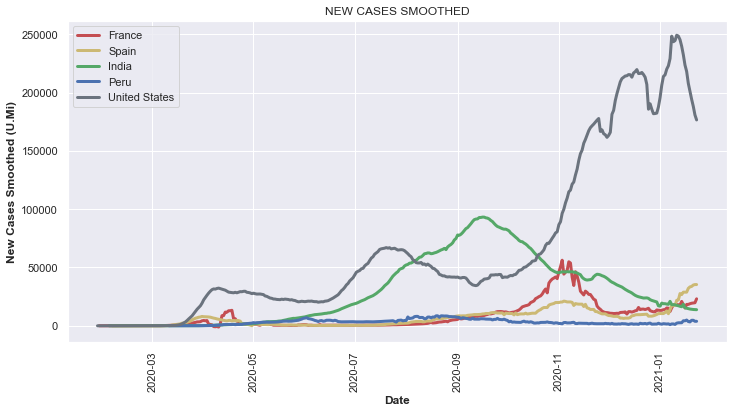

In [15]:
# @KapilDM
#NEW_CASES_SMOOTHED plot 
sns.set()
y_plot = data_final[(data_final["location"] == "France")].new_cases_smoothed
x_plot = data_final[(data_final["location"] == "France")].date
y_plot2 = data_final[(data_final["location"] == "Spain")].new_cases_smoothed
x_plot2 = data_final[(data_final["location"] == "Spain")].date
y_plot3 = data_final[(data_final["location"] == "India")].new_cases_smoothed
x_plot3 = data_final[(data_final["location"] == "India")].date
y_plot4 = data_final[(data_final["location"] == "Peru")].new_cases_smoothed
x_plot4 = data_final[(data_final["location"] == "Peru")].date
y_plot5 = data_final[(data_final["location"] == "United States")].new_cases_smoothed
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values, y_plot, color='r', label="France",linewidth= 3)
plt.plot(x_plot2.values, y_plot2, color='y', label="Spain",linewidth= 3)
plt.plot(x_plot3.values, y_plot3, color='g', label="India",linewidth= 3)
plt.plot(x_plot4.values, y_plot4, color='b', label="Peru",linewidth= 3)
plt.plot(x_plot5.values, y_plot5,  color='#6B737E', label="United States",linewidth= 3)

plt.title("NEW CASES SMOOTHED")
plt.xlabel("Date", weight="bold")
plt.ylabel("New Cases Smoothed (U.Mi)", weight="bold")
plt.xticks(rotation="90")
plt.legend()

name_fig = "\\resources\\New_Cases_Smoothed.png"
plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')
plt.show()

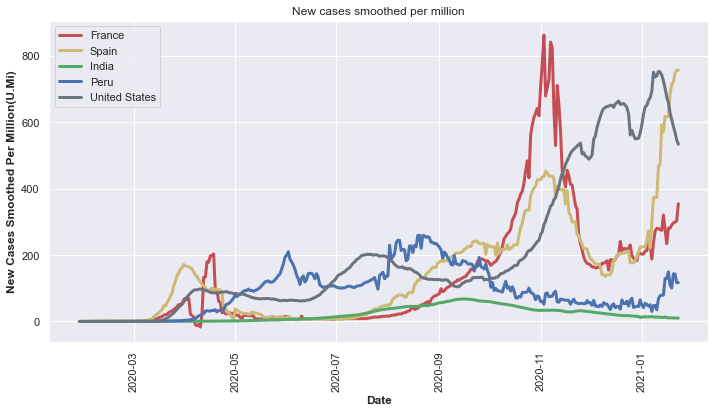

In [16]:
# new_cases_smoothed_per_million plot
# @KapilDM
sns.set()
y_plot = data_final[(data_final["location"] == "France")].new_cases_smoothed_per_million
x_plot = data_final[(data_final["location"] == "France")].date
y_plot2 = data_final[(data_final["location"] == "Spain")].new_cases_smoothed_per_million
x_plot2 = data_final[(data_final["location"] == "Spain")].date
y_plot3 = data_final[(data_final["location"] == "India")].new_cases_smoothed_per_million
x_plot3 = data_final[(data_final["location"] == "India")].date
y_plot4 = data_final[(data_final["location"] == "Peru")].new_cases_smoothed_per_million
x_plot4 = data_final[(data_final["location"] == "Peru")].date
y_plot5 = data_final[(data_final["location"] == "United States")].new_cases_smoothed_per_million
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values, y_plot, color='r', label="France",linewidth= 3)
plt.plot(x_plot2.values, y_plot2, color='y', label="Spain",linewidth= 3)
plt.plot(x_plot3.values, y_plot3, color='g', label="India",linewidth= 3)
plt.plot(x_plot4.values, y_plot4, color='b', label="Peru",linewidth= 3)
plt.plot(x_plot5.values, y_plot5,  color='#6B737E', label="United States",linewidth= 3)

plt.title("New cases smoothed per million")
 
plt.xlabel("Date", weight="bold")
plt.ylabel("New Cases Smoothed Per Million(U.Mi)", weight="bold")
plt.xticks(rotation="90")
plt.legend()

name_fig = "\\resources\\New_Cases_Smoothed_Per_Million.png"
plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')
plt.show()

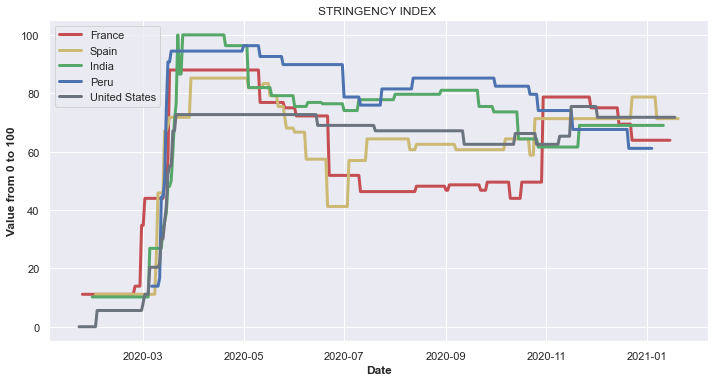

In [17]:
#@KapilDM
#Stringency_Index Plot
# This is a composite measure based on nine response indicators including school closures,
# workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest)

y_plot = data_final[(data_final["location"] == "France")].stringency_index
x_plot = data_final[(data_final["location"] == "France")].date
y_plot2 = data_final[(data_final["location"] == "Spain")].stringency_index
x_plot2 = data_final[(data_final["location"] == "Spain")].date
y_plot3 = data_final[(data_final["location"] == "India")].stringency_index
x_plot3 = data_final[(data_final["location"] == "India")].date
y_plot4 = data_final[(data_final["location"] == "Peru")].stringency_index
x_plot4 = data_final[(data_final["location"] == "Peru")].date
y_plot5 = data_final[(data_final["location"] == "United States")].stringency_index
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values,y_plot, label= "France",color="r",linewidth= 3) 
plt.plot(x_plot2.values,y_plot2, label= "Spain", color="y",linewidth= 3) 
plt.plot(x_plot3.values,y_plot3, label="India", color="g",linewidth= 3) 
plt.plot(x_plot4.values,y_plot4, label= "Peru", color="b",linewidth= 3)
plt.plot(x_plot5.values,y_plot5, label= "United States", color="#6B737E",linewidth= 3)

plt.title("STRINGENCY INDEX ")
plt.xlabel("Date",weight="bold")
plt.ylabel("Value from 0 to 100", weight="bold")
plt.legend() 

name_fig = "\\resources\\Stringency_Index.png"
plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')
plt.show()


In [26]:
def country_alarm_state_func(df,country):
    #@KapilDM
    y_total_cases = df[(df["location"] == country)].total_cases
    y_total_cases_per_million = df[(df["location"] == country)].total_cases_per_million
    y_new_cases_smoothed = df[(df["location"] == country)].new_cases_smoothed
    y_new_cases_smoothed_per_million = df[(df["location"] == country)].new_cases_smoothed_per_million
    y_new_deaths_smoothed = df[(df["location"] == country)].new_deaths_smoothed
    y_new_deaths_smoothed_per_million = df[(df["location"] == country)].new_deaths_smoothed_per_million
    y_total_deaths = df[(df["location"] == country)].total_deaths
    y_total_deaths_per_million = df[(df["location"] == country)].total_deaths_per_million
    y_stringency_index = df[(df["location"] == country)].stringency_index
    y_life_expectancy = df[(df["location"] == country)].life_expectancy
    y_new_deaths = df[(df["location"] == country)].new_deaths

    lista = [y_total_cases,y_total_cases_per_million,y_new_cases_smoothed,y_new_cases_smoothed_per_million,     y_new_deaths_smoothed,y_new_deaths_smoothed_per_million,y_total_deaths,y_total_deaths_per_million,  y_stringency_index,y_life_expectancy,y_new_deaths]
    lista2 = ["y_total_cases","y_total_cases_per_million","y_new_cases_smoothed",    "y_new_cases_smoothed_per_million","y_new_deaths_smoothed","y_new_deaths_smoothed_per_million","y_total_deaths","y_total_deaths_per_million","y_stringency_index","y_life_expectancy","y_new_deaths"]

    sns.set_style("whitegrid")
    x_plot = df[(df["location"] == country)].date
    for pos,val in enumerate(lista):
        plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
        plt.title(str(country) + " - " + lista2[pos]) #HE cambiado esto 
        plt.xlabel("Date", weight="bold")
        plt.ylabel(lista2[pos], weight="bold")
        plt.xticks(rotation="90")

        if country == "France":
            plt.plot(x_plot.values, val, color='r', label = lista2[pos],linewidth= 2)
            plt.axvline(pd.to_datetime('2020-03-23'), color="#9433FF", linestyle='--', lw=2, label='FIRST: Start /End alarm state')
            plt.axvline(pd.to_datetime('2020-07-10'), color="#9433FF", linestyle='--', lw=2)
            plt.axvline(pd.to_datetime('2020-10-17'), color="#F633FF", linestyle='--', lw=2, label='SECOND: Start alarm state')
            plt.axvspan(pd.to_datetime('2020-03-23'), pd.to_datetime('2020-07-10'), alpha=0.04, color='#9433FF')
            plt.savefig(root_path + "\\resources\\France\\" + lista2[pos] + ".png", dpi=300, bbox_inches='tight')
        elif country == "Spain":
            plt.plot(x_plot.values, val, color='y', label = lista2[pos],linewidth= 2)
            plt.axvline(pd.to_datetime('2020-03-14'), color="#9433FF", linestyle='--', lw=2, label='FIRST: Start /End alarm state')
            plt.axvline(pd.to_datetime('2020-06-21'), color="#9433FF", linestyle='--', lw=2)
            plt.axvline(pd.to_datetime('2020-10-25'), color="#F633FF", linestyle='--', lw=2, label='SECOND: Start alarm State')
            plt.axvspan(pd.to_datetime('2020-03-14'), pd.to_datetime('2020-06-21'), alpha=0.04, color='#9433FF')
            plt.savefig(root_path + "\\resources\\Spain\\" + lista2[pos] + ".png", dpi=300, bbox_inches='tight')
        elif country == "India":
            plt.plot(x_plot.values, val, color='g', label = lista2[pos],linewidth= 2)
            plt.axvline(pd.to_datetime('2020-03-24'), color="#9433FF", linestyle='--', lw=2, label='FIRST: Start /End alarm state')
            plt.axvline(pd.to_datetime('2020-05-31'), color="#9433FF", linestyle='--', lw=2)
            plt.axvspan(pd.to_datetime('2020-03-24'), pd.to_datetime('2020-05-31'), alpha=0.04, color='#9433FF')
            plt.savefig(root_path + "\\resources\\India\\" + lista2[pos] + ".png", dpi=300, bbox_inches='tight')
        elif country == "Peru":
            plt.plot(x_plot.values, val, color='b', label = lista2[pos],linewidth= 2)
            plt.axvline(pd.to_datetime('2020-03-15'), color="#9433FF", linestyle='--', lw=2, label='FIRST: Start alarm state')
            plt.savefig(root_path + "\\resources\\Peru\\" + lista2[pos] + ".png", dpi=300, bbox_inches='tight')
        elif country == "United States":
            plt.plot(x_plot.values, val, color='#6B737E', label = lista2[pos],linewidth= 2)
            plt.axvline(pd.to_datetime('2020-03-15'), color="#9433FF", linestyle='--', lw=2, label='FIRST: Start Alarm State')
            plt.savefig(root_path + "\\resources\\United_States\\" + lista2[pos] + ".png", dpi=300, bbox_inches='tight')
            
        plt.legend()
        plt.show()

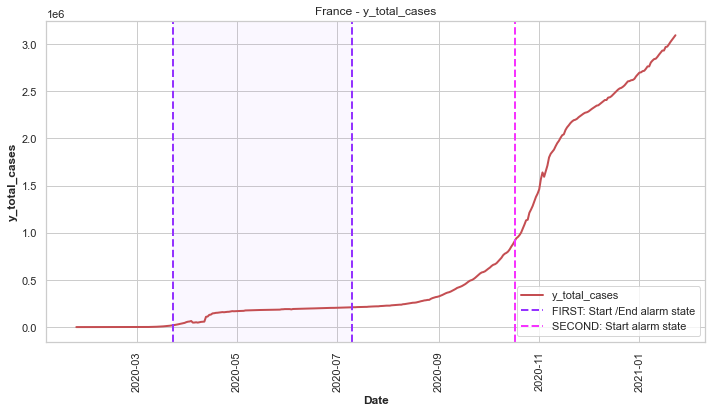

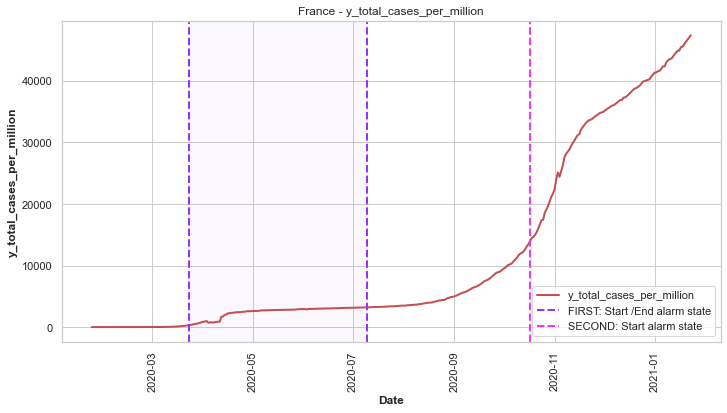

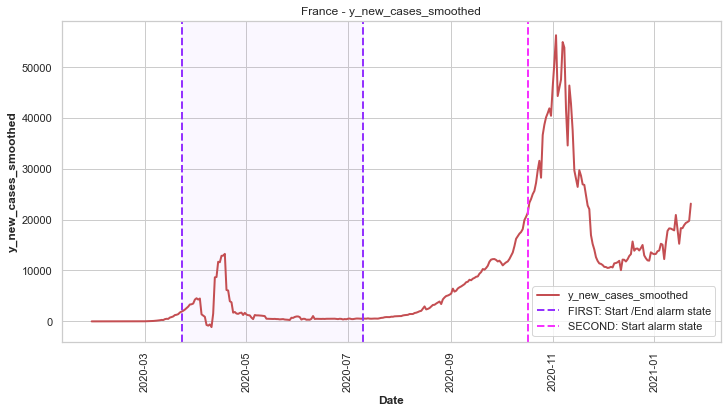

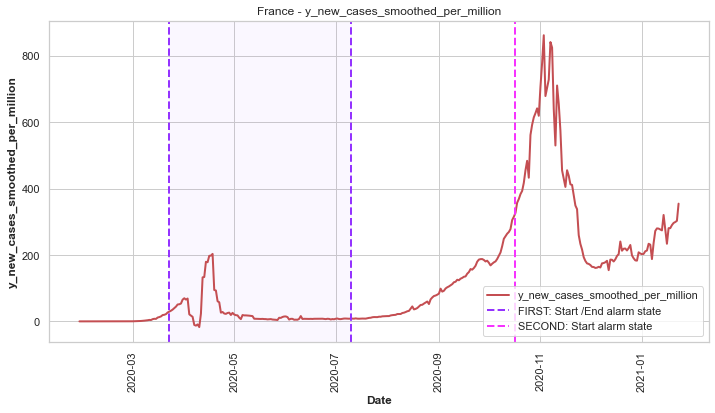

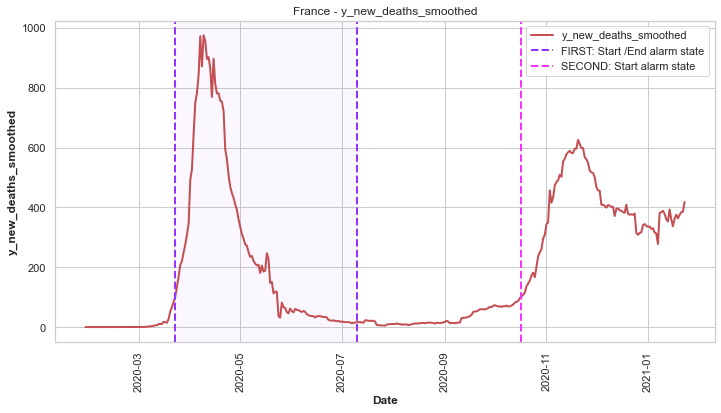

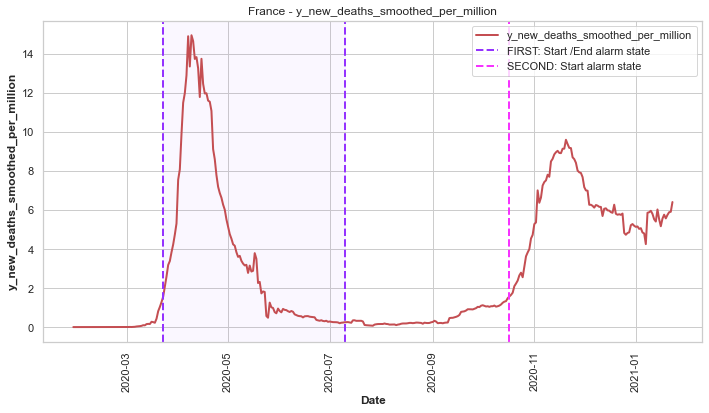

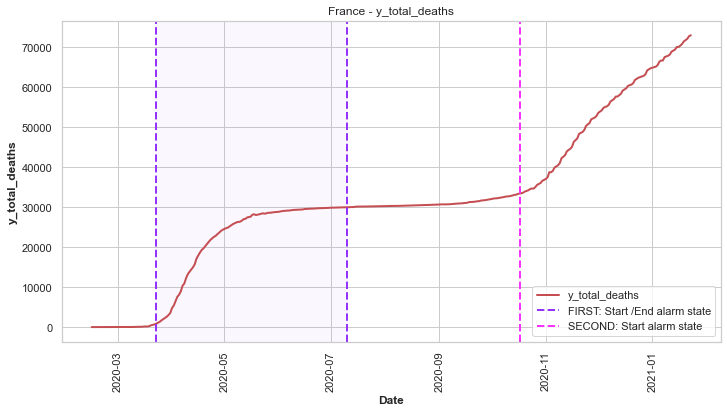

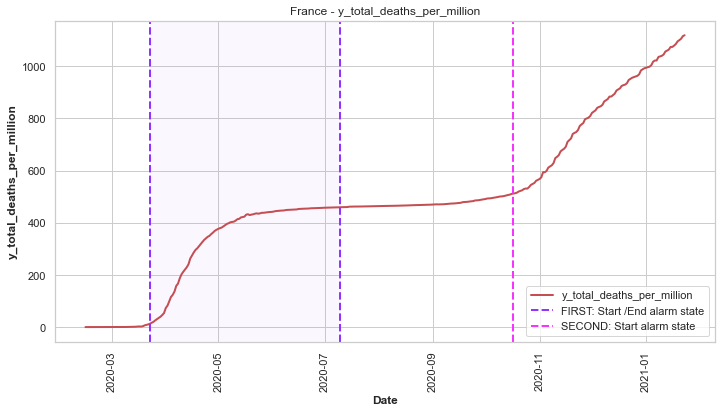

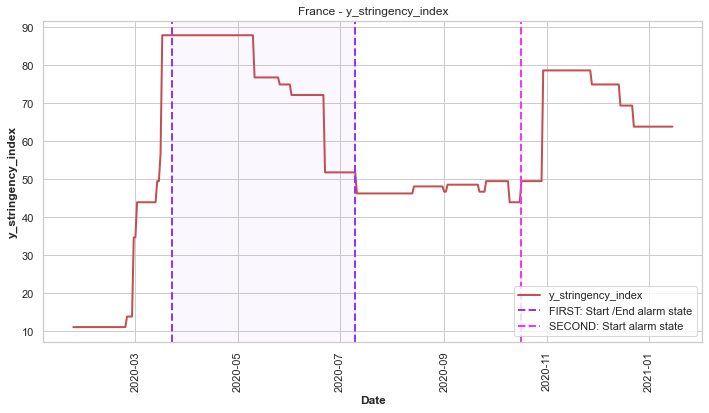

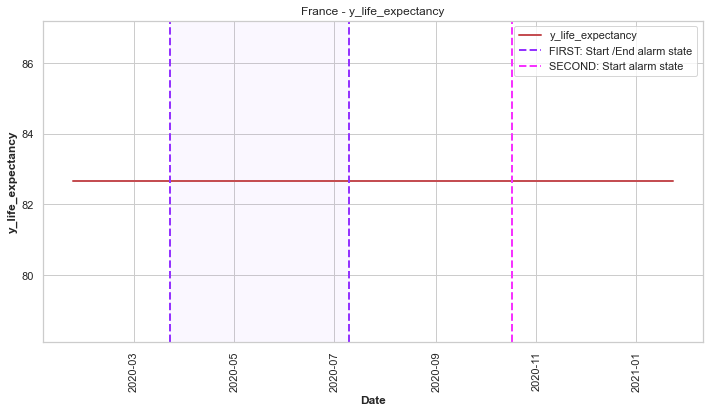

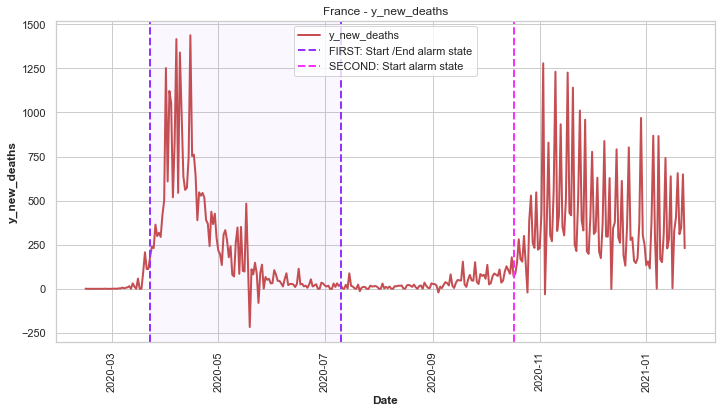

In [20]:
#France alarm state info: https://www.aa.com.tr/en/europe/france-extends-covid-19-state-of-emergency-to-feb-16/2032593 
country_alarm_state_func(df=data_final,country="France")

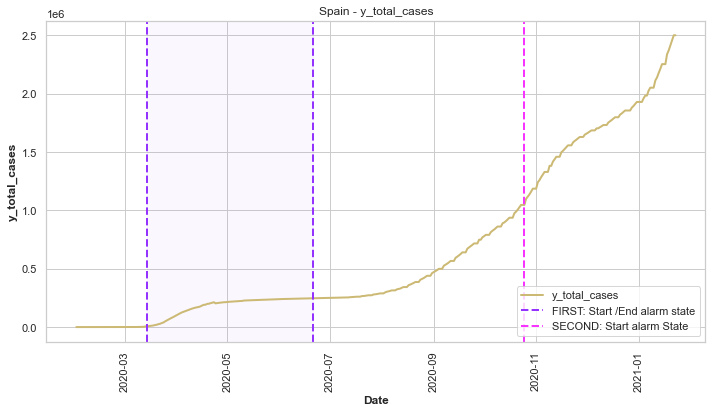

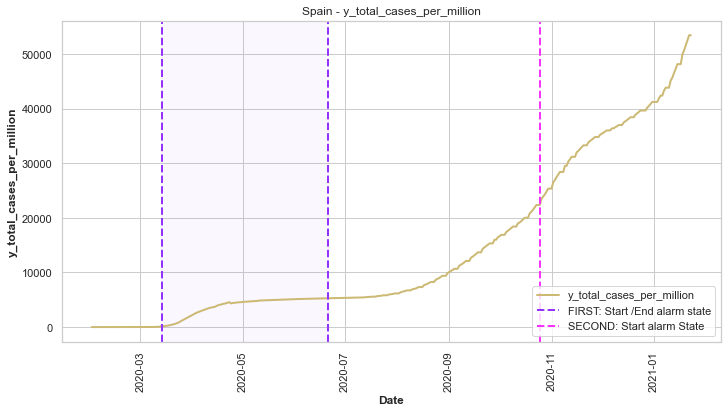

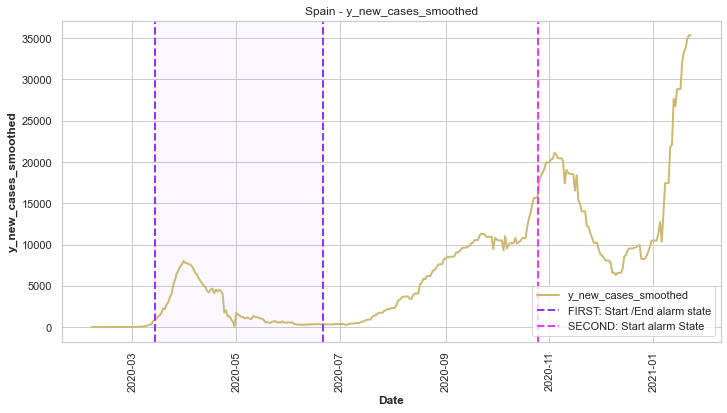

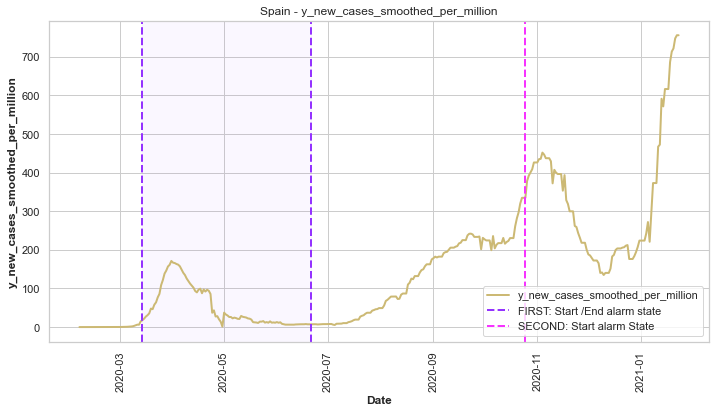

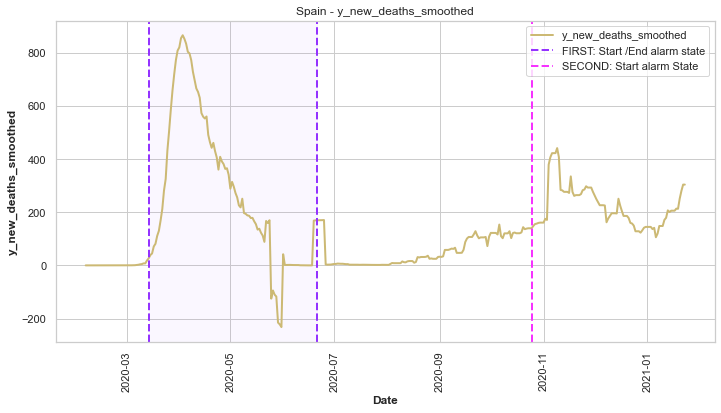

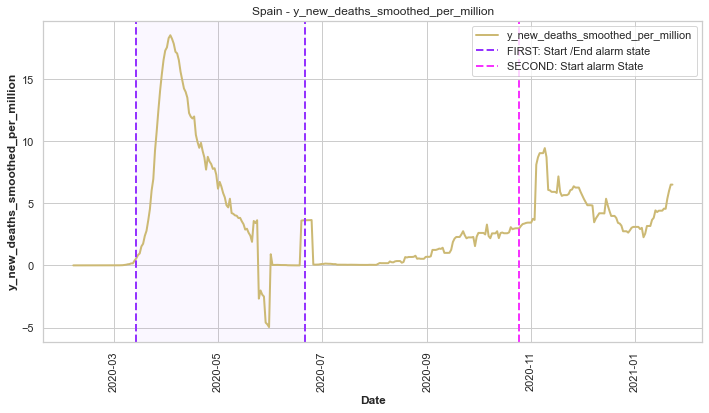

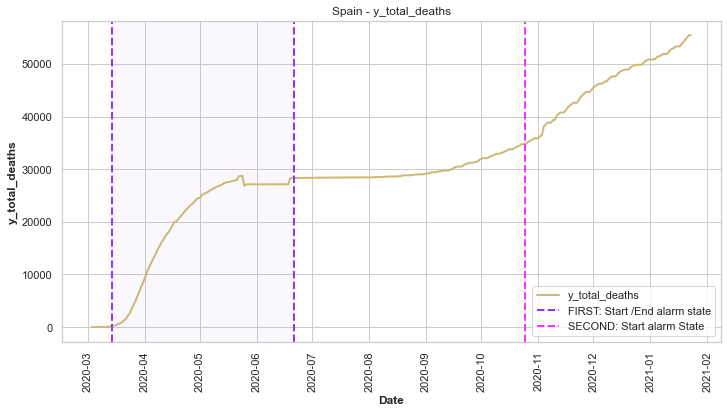

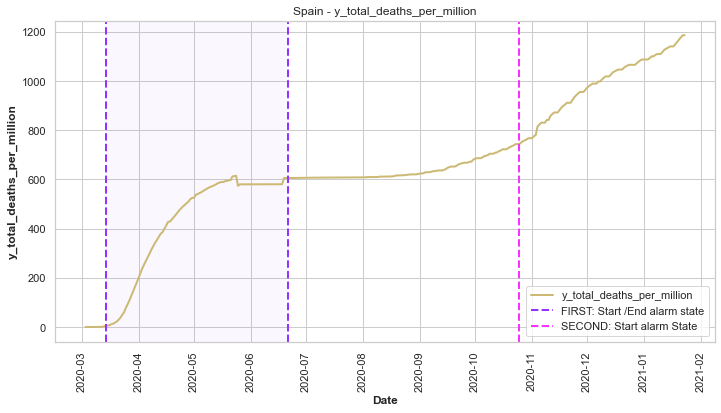

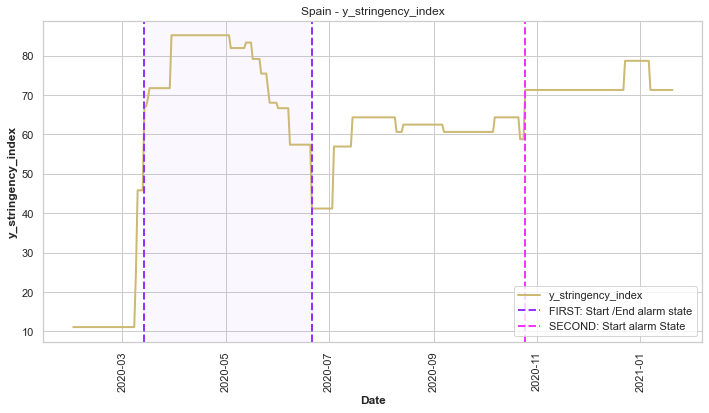

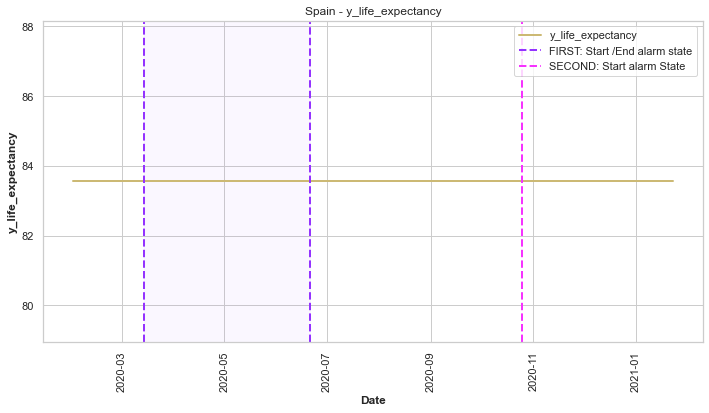

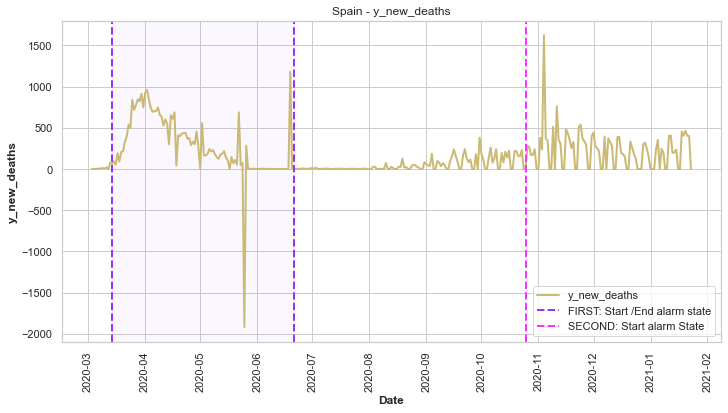

In [27]:
#Spain : https://www.lamoncloa.gob.es/covid-19/Paginas/estado-de-alarma.aspx
country_alarm_state_func(df=data_final,country="Spain")

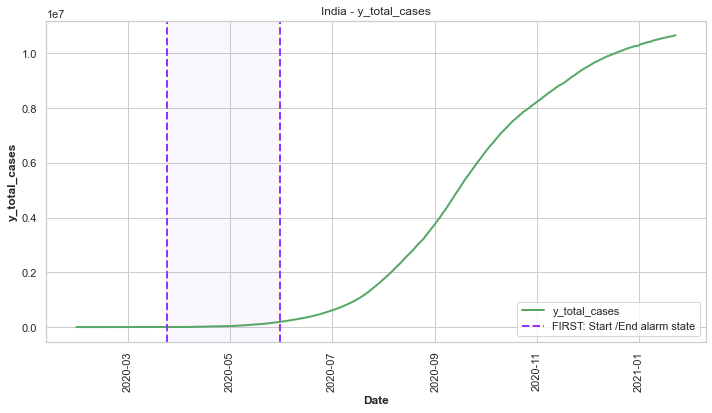

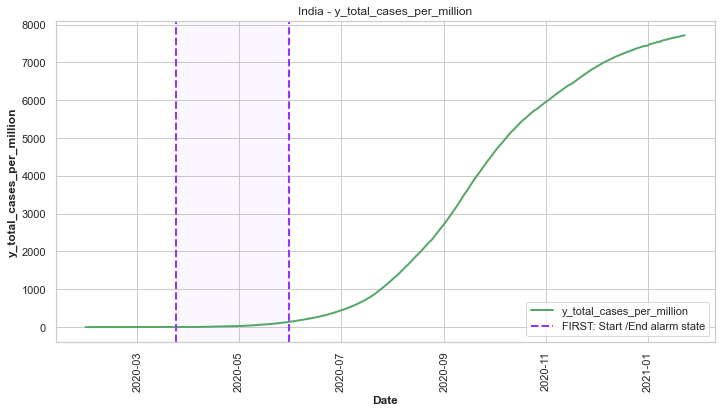

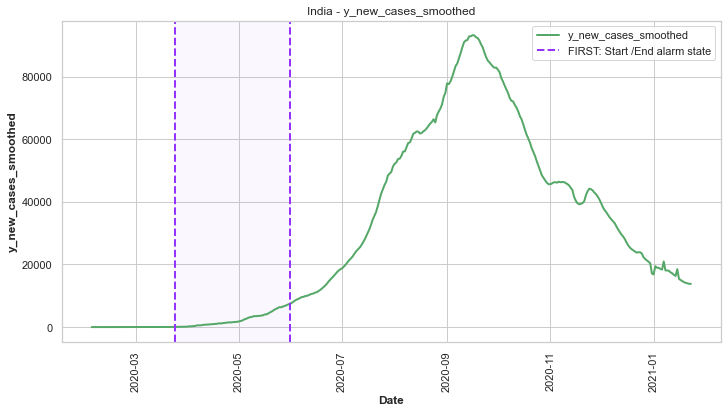

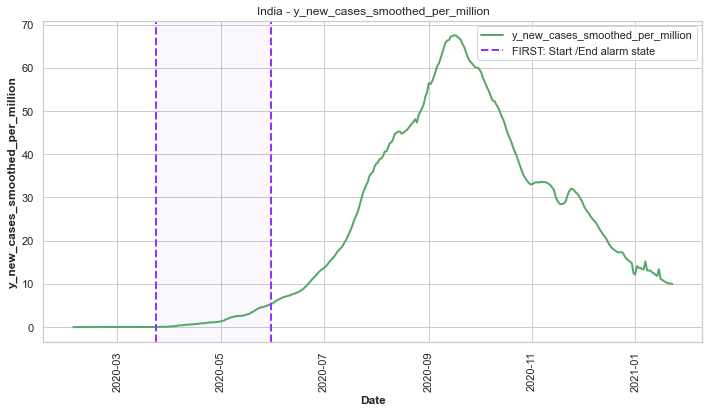

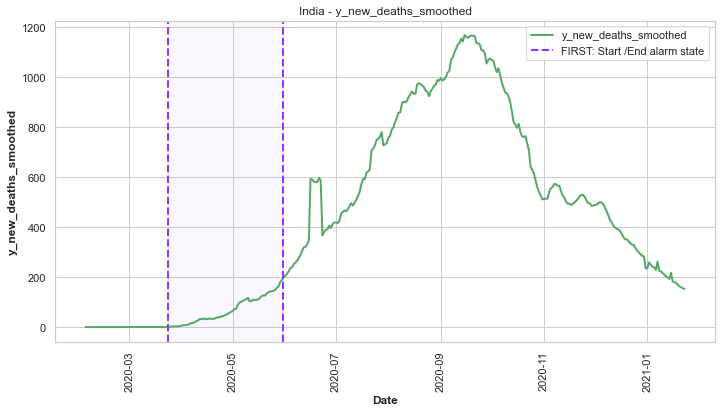

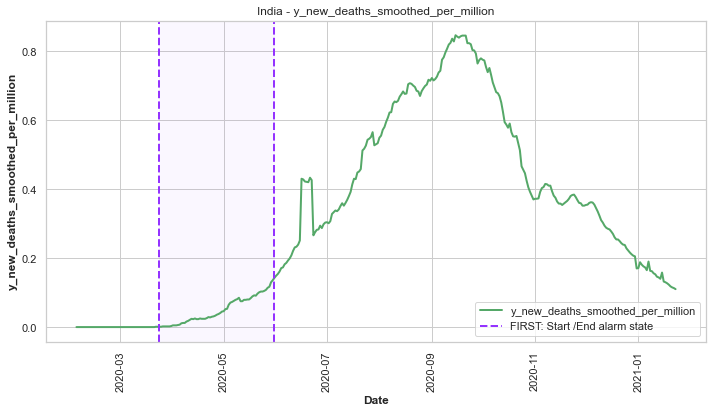

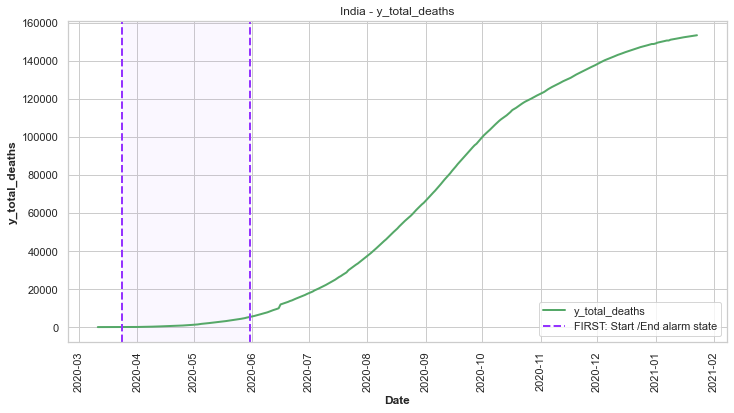

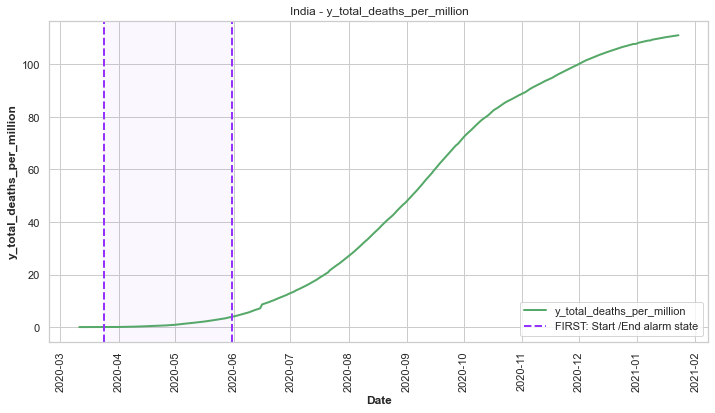

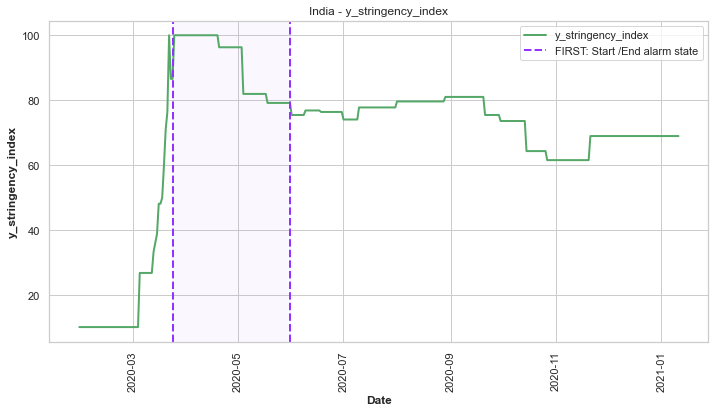

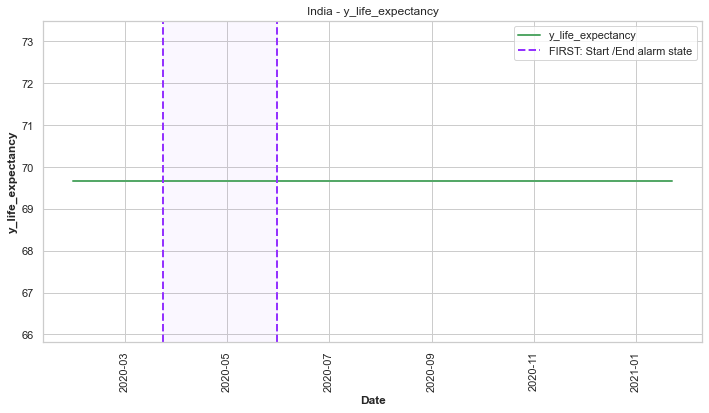

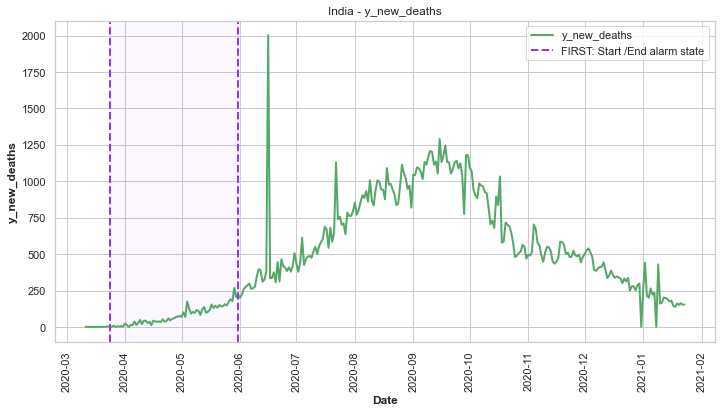

In [28]:
#India alarm state info: https://www.brookings.edu/blog/future-development/2020/07/02/how-well-is-india-responding-to-covid-19/
# https://www.indiatvnews.com/news/india/lockdown-unlock-in-india-covid19-pandemic-guidelines-restrictions-2020-coronavirus-lockdown-series-674925
country_alarm_state_func(df=data_final,country="India")

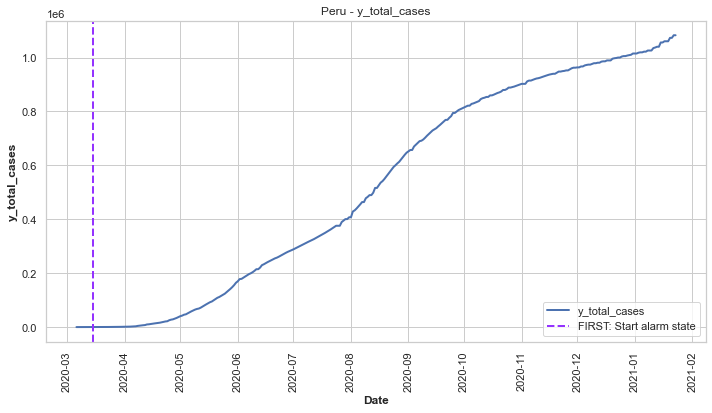

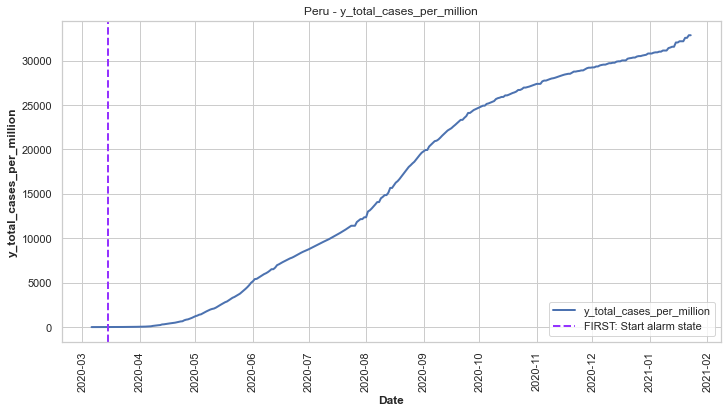

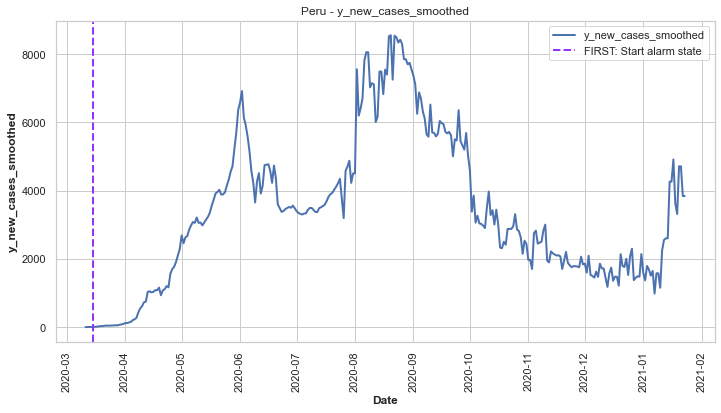

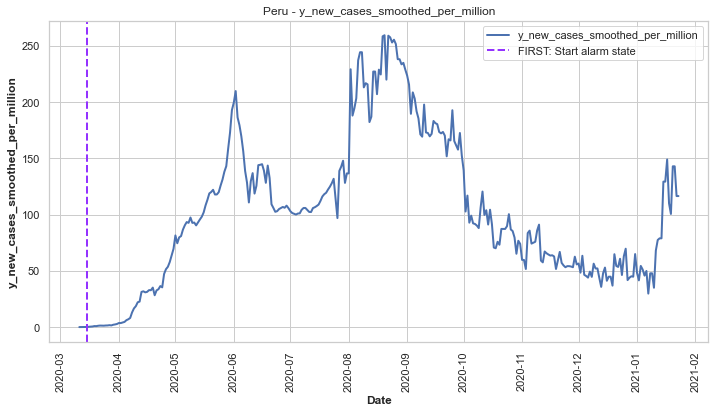

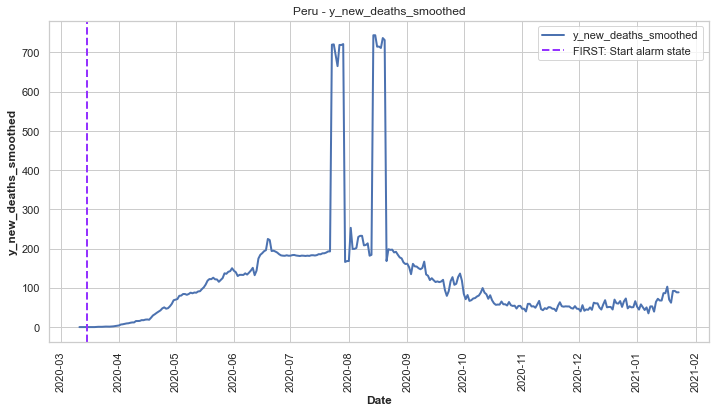

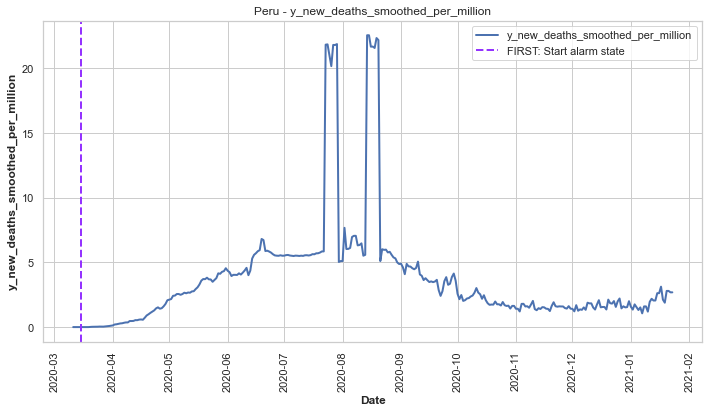

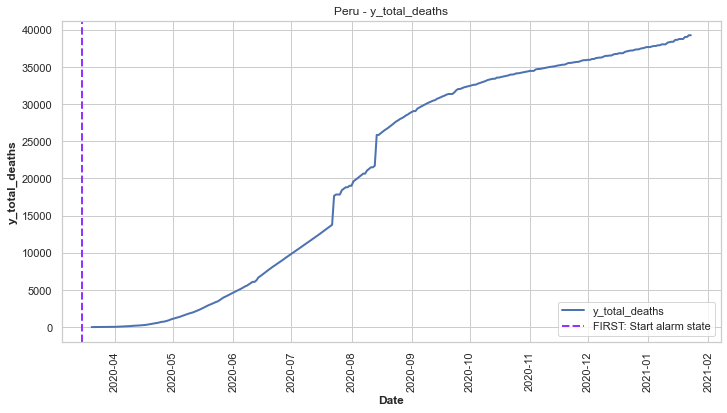

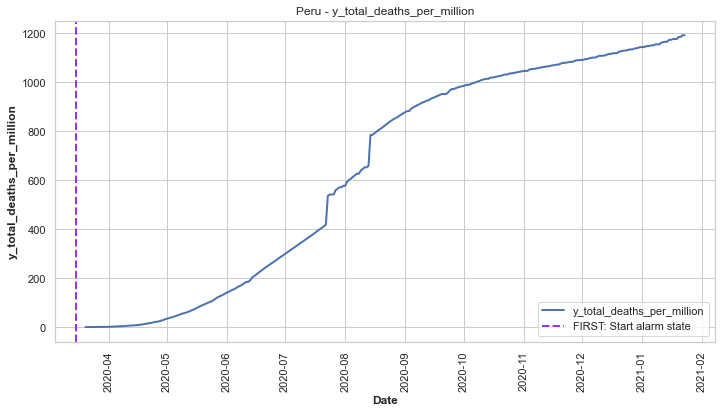

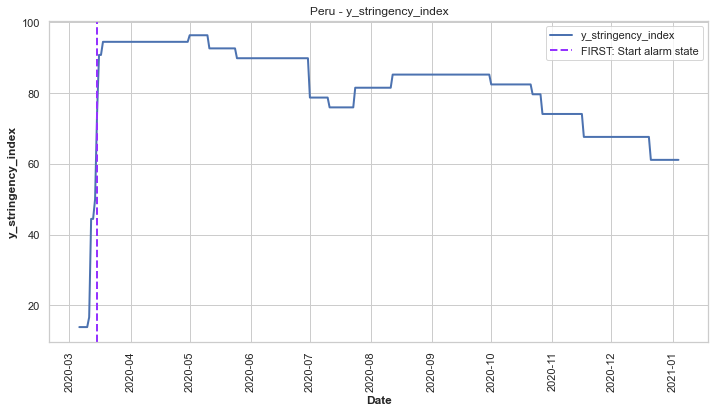

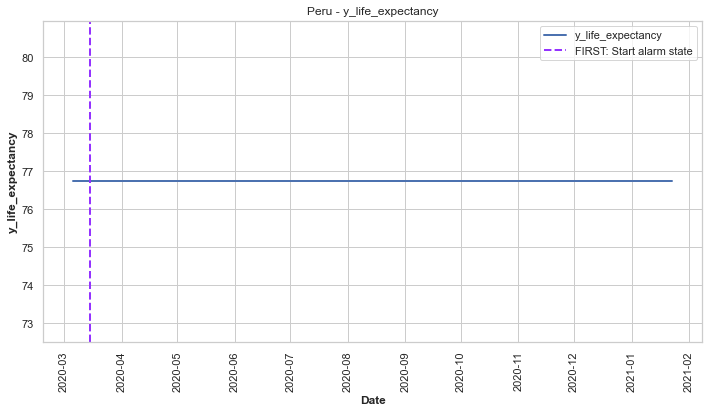

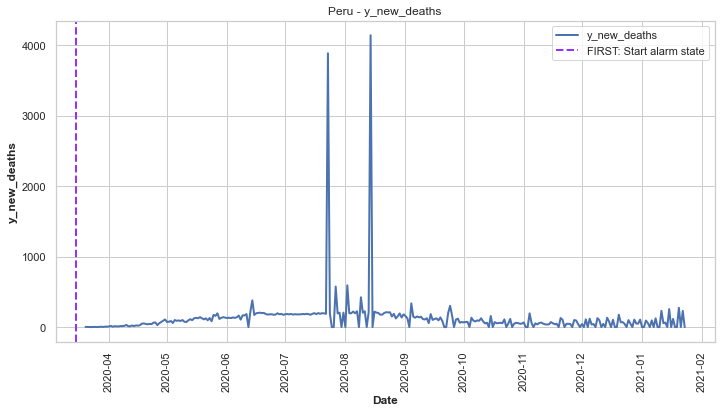

In [29]:
#Peru : https://www.gob.pe/8784-coronavirus-preguntas-y-respuestas-sobre-el-estado-de-emergencia
country_alarm_state_func(df=data_final,country="Peru")

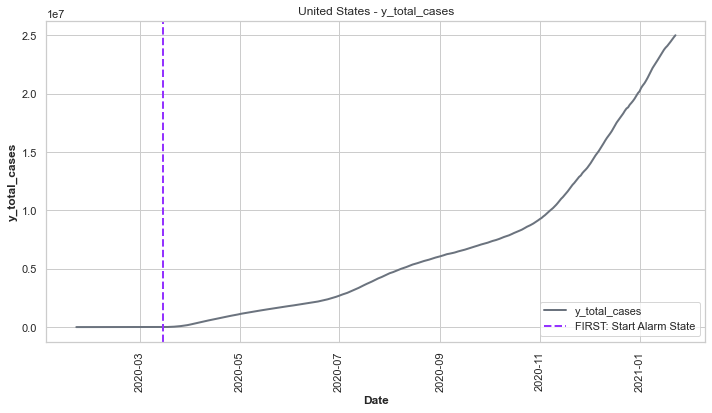

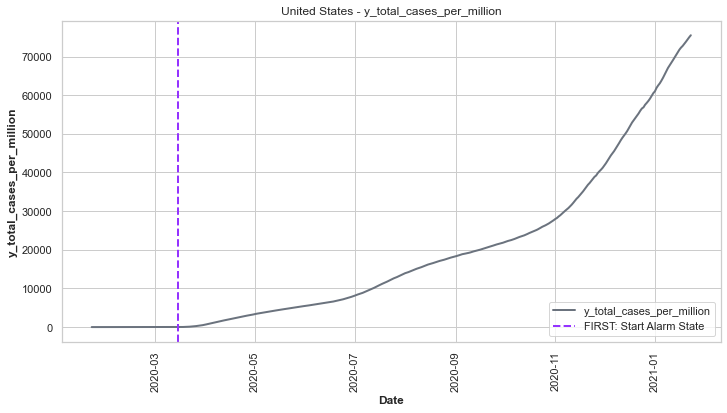

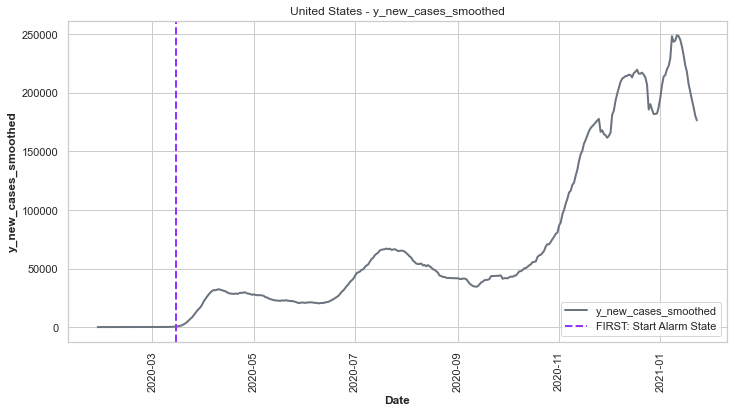

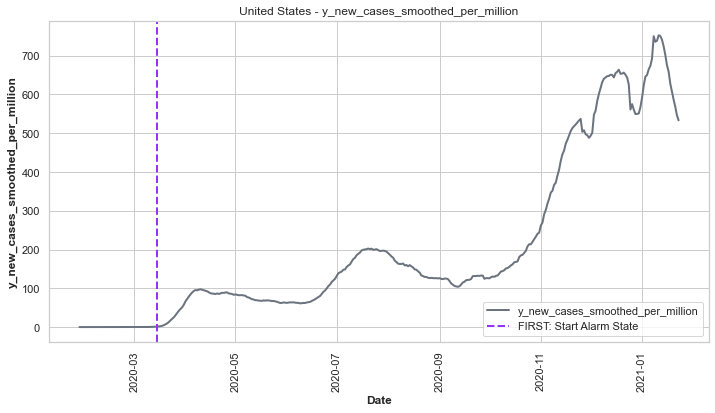

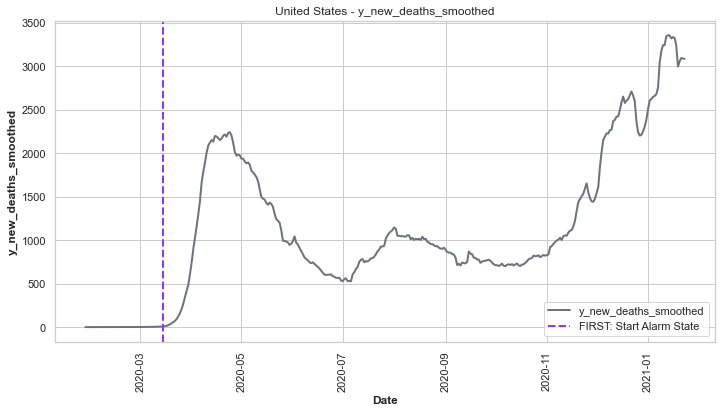

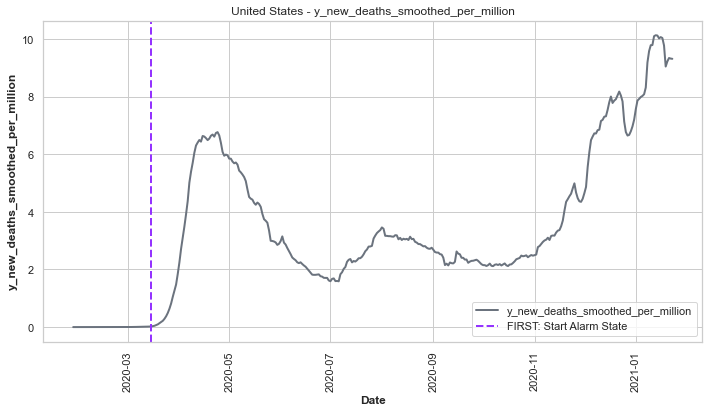

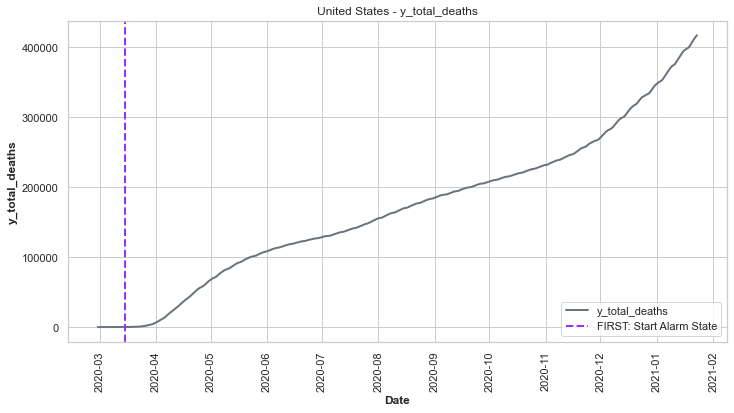

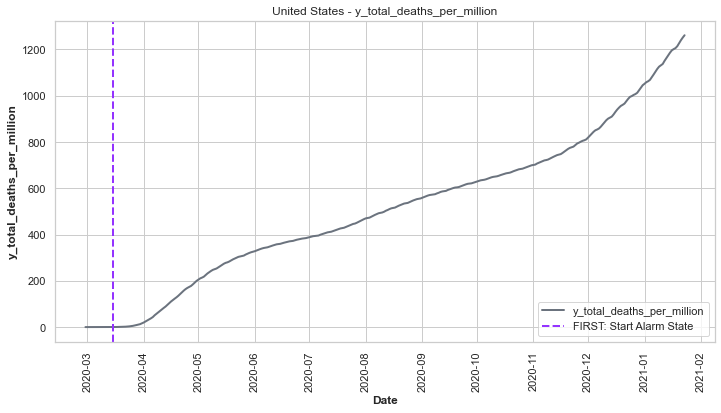

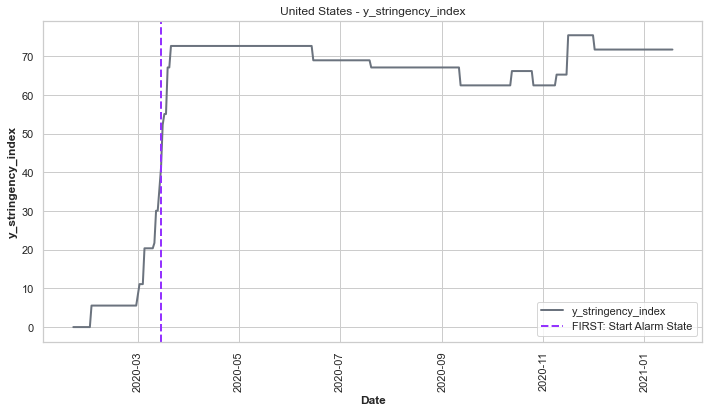

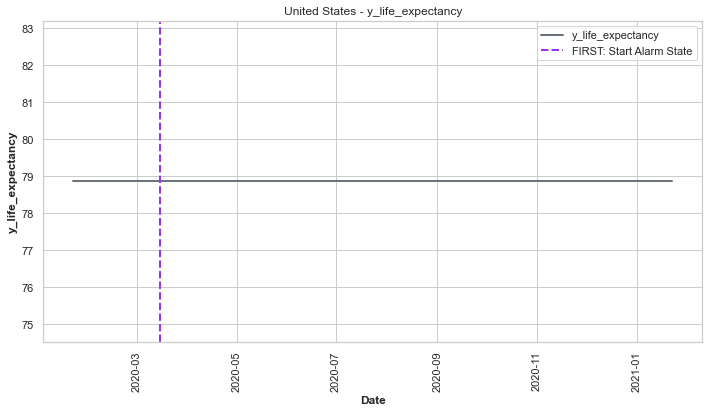

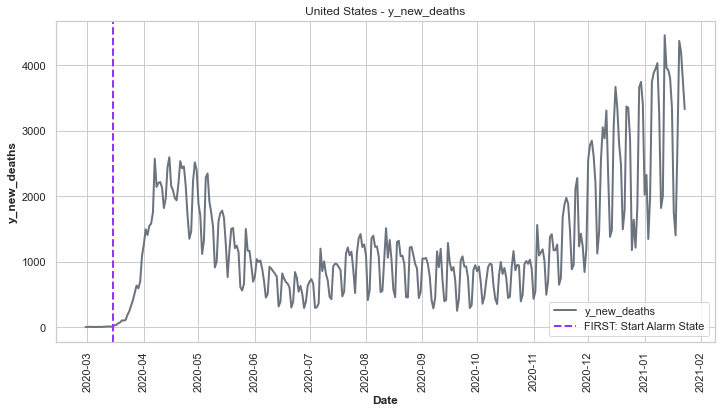

In [31]:
#United States alarm state info: https://en.wikipedia.org/wiki/List_of_national_emergencies_in_the_United_States
country_alarm_state_func(df=data_final,country="United States")

## Correlation Matrix

total_cases  total_cases_per_million  \
total_cases                         1.000000                 0.568053   
total_cases_per_million             0.568053                 1.000000   
new_cases_smoothed                  0.883274                 0.543733   
new_cases_smoothed_per_million      0.537812                 0.777534   
new_deaths_smoothed                 0.726328                 0.408334   
new_deaths_smoothed_per_million     0.144429                 0.379185   
total_deaths                        0.943532                 0.568838   
total_deaths_per_million            0.196726                 0.848008   
life_expectancy                    -0.220579                 0.235422   
stringency_index                    0.101785                 0.181501   
new_deaths                          0.656483                 0.352484   

                                 new_cases_smoothed  \
total_cases                                0.883274   
total_cases_per_million                    0.543733   
new_cases_smoothed                         1.000000   
new_cases_smoothed_per_million             0.664843   
new_deaths_smoothed                        0.843485   
new_deaths_smoothed_per_million            0.213721   
total_deaths                               0.864211   
total_deaths_per_million                   0.179799   
life_expectancy                           -0.151598   
stringency_index                           0.120743   
new_deaths                                 0.777043   

                                 new_cases_smoothed_per_million  \
total_cases                                            0.537812   
total_cases_per_million                                0.777534   
new_cases_smoothed                                     0.664843   
new_cases_smoothed_per_million                         1.000000   
new_deaths_smoothed                                    0.518645   
new_deaths_smoothed_per_million                        0.483771   
total_deaths                                           0.533770   
total_deaths_per_million                               0.545373   
life_expectancy                                        0.277515   
stringency_index                                       0.169951   
new_deaths                                             0.471693   

                                 new_deaths_smoothed  \
total_cases                                 0.726328   
total_cases_per_million                     0.408334   
new_cases_smoothed                          0.843485   
new_cases_smoothed_per_million              0.518645   
new_deaths_smoothed                         1.000000   
new_deaths_smoothed_per_million             0.437976   
total_deaths                                0.742454   
total_deaths_per_million                    0.067555   
life_expectancy                            -0.116940   
stringency_index                            0.219689   
new_deaths                                  0.909667   

                                 new_deaths_smoothed_per_million  \
total_cases                                             0.144429   
total_cases_per_million                                 0.379185   
new_cases_smoothed                                      0.213721   
new_cases_smoothed_per_million                          0.483771   
new_deaths_smoothed                                     0.437976   
new_deaths_smoothed_per_million                         1.000000   
total_deaths                                            0.128139   
total_deaths_per_million                                0.289042   
life_expectancy                                         0.277355   
stringency_index                                        0.358702   
new_deaths                                              0.375228   

                                 total_deaths  total_deaths_per_million  \
total_cases                          0.943532                  0.196726   
total_cases_per_million              0.568838     

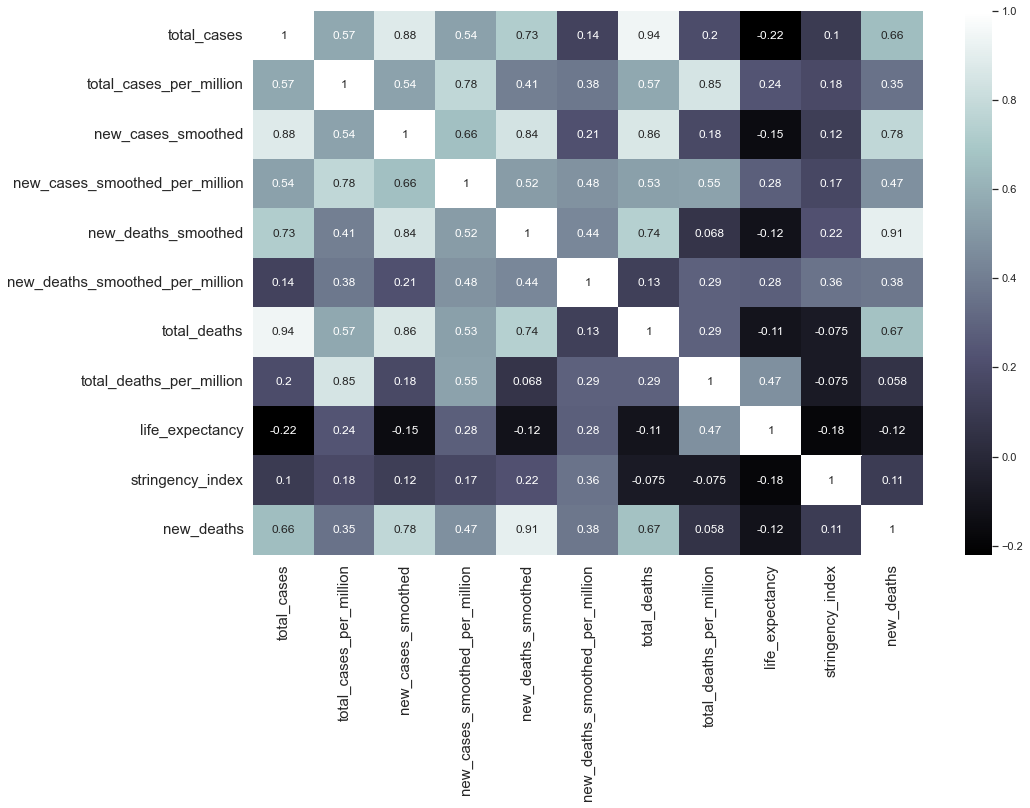

In [24]:
# Creating the graph
plt.figure(figsize=(15,10))
correlation_covid = data_final.corr()
heatmap_covid = sns.heatmap(correlation_covid, cmap="bone",annot=True)
fig_corr_covid = heatmap_covid.get_figure()

# Labels
plt.yticks(va="center", rotation = 0, fontsize=15)
plt.xticks(fontsize=15)

# Showing the chart
correlation_covid

In [25]:
#Saving the correlation matrix 
name_fig = "\\resources\\Correlation_matrix_covid_dataset_Bgroup.png"

fig_corr_covid.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')